<a href="https://colab.research.google.com/github/Timure228/Hands-on-ML/blob/main/Chapter_10_introduction_to_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

Perceptrons are incapable of learning complex patterns.
Works well, if the training instances are linearly separable.

In [ ]:
# Train perceptron
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1], [0.8, 1.7]]
y_pred = per_clf.predict(X_new) # predicts True or False for these 2 flowers

In [ ]:
y_pred

array([ True, False, False])

In [ ]:
# Let's train MLP (Multi-Layer-Perceptron)
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import math

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, y_pred)) # about 0.505

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
rmse

0.5548464158412977

# Keras

MLPs

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train.shape # each image is 28 x 28 with 0-255 pixel intensity

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
# Scale pixels
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names[y_train[0]]

'Ankle boot'

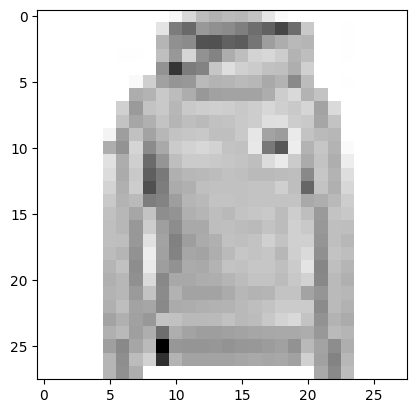

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[54], cmap="binary")

In [ ]:
# Now build the network
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu", name="first_dense"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

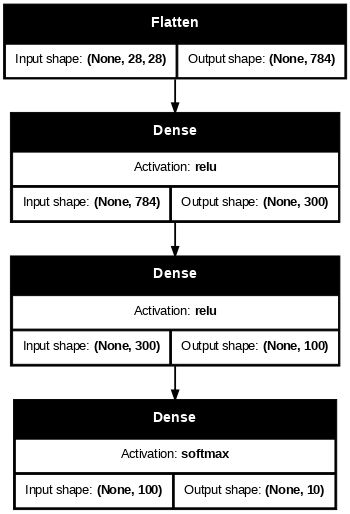

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, dpi=65) # Plot the model

In [ ]:
model.layers # get the layers

[<Flatten name=flatten, built=True>,
 <Dense name=first_dense, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [ ]:
model.layers[1].name

'first_dense'

In [ ]:
model.get_layer("first_dense")

<Dense name=first_dense, built=True>

In [ ]:
# Get parameters
weights, biases = model.layers[1].get_weights()
weights

array([[-0.01819157,  0.02037852, -0.01150876, ..., -0.07138746,
        -0.01639082,  0.0249346 ],
       [ 0.00074077, -0.03074362, -0.06960018, ...,  0.0409727 ,
        -0.06077538, -0.02798964],
       [ 0.02729457,  0.01147521,  0.05277765, ..., -0.05033237,
        -0.03903396,  0.00263146],
       ...,
       [ 0.02715096,  0.03616468, -0.04640563, ..., -0.00902335,
         0.02456519,  0.04230994],
       [ 0.02040949, -0.07008199,  0.06808613, ..., -0.01319512,
         0.06847058,  0.00824931],
       [ 0.07271269,  0.03915491, -0.0016319 , ...,  0.00643985,
        -0.05312876,  0.05916002]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases[:5], biases.shape

(array([0., 0., 0., 0., 0.], dtype=float32), (300,))

### To change parameters initialization method use kernel_initializer= and bias_initializer= paramaters for layer

In [ ]:
# Define model's loss and optimizer
from keras.optimizers import SGD

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6863 - loss: 0.9843 - val_accuracy: 0.8312 - val_loss: 0.4935
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8283 - loss: 0.5012 - val_accuracy: 0.8424 - val_loss: 0.4461
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8437 - loss: 0.4505 - val_accuracy: 0.8456 - val_loss: 0.4252
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8541 - loss: 0.4212 - val_accuracy: 0.8546 - val_loss: 0.4121
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8603 - loss: 0.3997 - val_accuracy: 0.8570 - val_loss: 0.4012


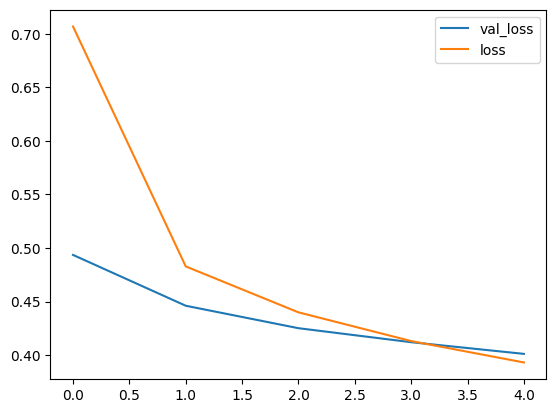

In [ ]:
# Plot the loss curves
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["loss"], label="loss")
plt.legend()
plt.show()

In [ ]:
history.params, history.epoch

({'verbose': 'auto', 'epochs': 5, 'steps': 1719}, [0, 1, 2, 3, 4])

<Axes: xlabel='Epochs'>

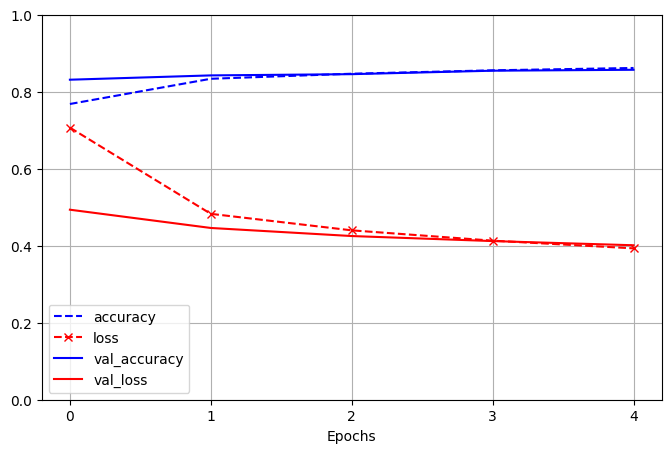

In [ ]:
import pandas as pd
# Plot each history metric
pd.DataFrame(history.history).plot(figsize=[8, 5], xticks=history.epoch, ylim=[0, 1], grid=True, xlabel="Epochs", style=["b--", "r--x", "b-", "r-"])

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8570 - loss: 0.4236


[0.4285740852355957, 0.8511999845504761]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [ ]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.15, 0.01, 0.62],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_labels = np.argmax(y_proba, axis=-1)

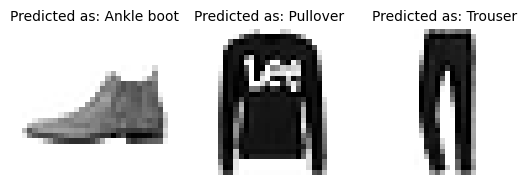

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3)

for i in range(3):
  ax[i].imshow(X_new[i].reshape(28, 28), cmap="binary")
  ax[i].set_title(f"Predicted as: {class_names[y_labels[i]]}", fontsize=10)
  ax[i].axis(False)

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
X = np.c_[np.array(housing["data"]["MedInc"]), np.array(housing["data"]["Population"])]
y = np.array(housing.target)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train, y_train = X_train[:-5000], y_train[:-5000]
X_valid, y_valid = X_train[-5000:], y_train[-5000:]

In [ ]:
X_train.shape

(13576, 2)

In [ ]:
# Let's train MLP on the housing dataset
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:]) # Let's take normalization layer as the Input layer
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Set the optimizer and compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train) # Now fit the normalization layer so it knows what to transform

# Train the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.6298 - loss: 2.7405 - val_RootMeanSquaredError: 0.9132 - val_loss: 0.8339
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8899 - loss: 0.7921 - val_RootMeanSquaredError: 0.8756 - val_loss: 0.7668
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8630 - loss: 0.7449 - val_RootMeanSquaredError: 0.8580 - val_loss: 0.7362
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.8496 - loss: 0.7219 - val_RootMeanSquaredError: 0.8485 - val_loss: 0.7200
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 0.8424 - loss: 0.7098 - val_RootMeanSquaredError: 0.8433 - val_loss: 0.7112
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8386 - loss: 0.7033 - val_RootMeanSquaredError: 0.8405 - val_loss: 0.7065
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8365 - los

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 2)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,308 (20.74 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 5 (24.00 B)

 Optimizer params: 2 (12.00 B)

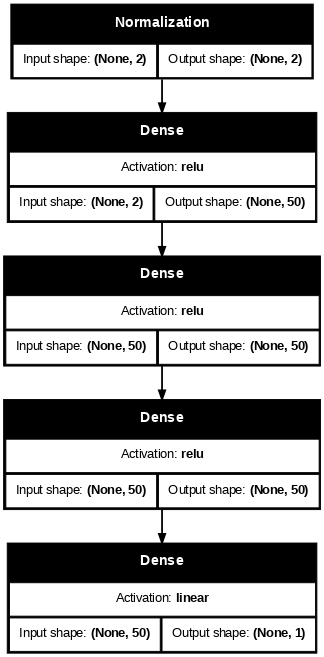

In [ ]:
tf.keras.utils.plot_model(model, to_file="housing.png", show_shapes=True, show_layer_activations=True, dpi=65) # Plot the model

In [ ]:
# Build more complex non-sequential Neural Networks (Deep & Wide model)
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concatenated = concat_layer([normalized, hidden2])
output = output_layer(concatenated)

complex_model = tf.keras.Model(inputs=[input_], outputs=[output])

In [ ]:
complex_model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_9     │ (None, 2)         │          5 │ input_layer_13[0… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 30)        │         90 │ normalization_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 30)        │        930 │ dense_41[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 32)        │          0 │ normalization_9[… │
│ (Concatenate)       │                   │            │ dense_42[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 1)         │         33 │ concatenate_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,058 (4.14 KB)

 Trainable params: 1,053 (4.11 KB)

 Non-trainable params: 5 (24.00 B)

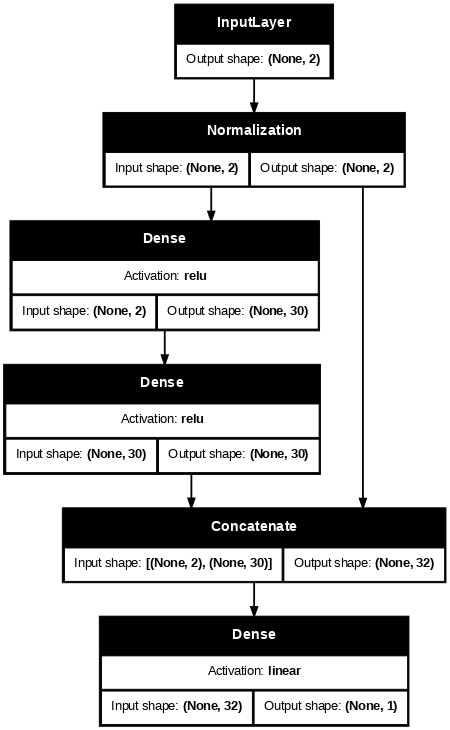

In [ ]:
tf.keras.utils.plot_model(complex_model, to_file="complex.png", show_shapes=True, show_layer_activations=True, dpi=65) # Plot the model

In [ ]:
# Let's train the complex model
normalization_layer.adapt(X_train)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
complex_model.compile(optimizer=optimizer, loss="mse", metrics=["RootMeanSquaredError"])

complex_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_100']
Received: inputs=Tensor(shape=(None, 2))
  warnings.warn(msg)


425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.4786 - loss: 2.3076 - val_RootMeanSquaredError: 0.8442 - val_loss: 0.7127
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8389 - loss: 0.7038 - val_RootMeanSquaredError: 0.8411 - val_loss: 0.7074
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.8361 - loss: 0.6991 - val_RootMeanSquaredError: 0.8402 - val_loss: 0.7059
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8349 - loss: 0.6972 - val_RootMeanSquaredError: 0.8392 - val_loss: 0.7043
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8336 - loss: 0.6949 - val_RootMeanSquaredError: 0.8376 - val_loss: 0.7015
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8321 - loss: 0.6926 - val_RootMeanSquaredError: 0.8361 - val_loss: 0.6990
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8305 - loss: 0.6899 -

In [ ]:
mse_test, rmse_test = complex_model.evaluate(X_test, y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.8427 - loss: 0.7126


In [ ]:
# Even more complex model with multiple inputs (wide & deep model)
input_wide = tf.keras.layers.Input(shape=[5], name="input_wide") # send features 0 to 4 through wide path
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep") # send features 2 to 7 through deep path
# Normalization
normalization_layer_wide = tf.keras.layers.Normalization()
normalization_layer_deep = tf.keras.layers.Normalization()
normalization_wide = normalization_layer_wide(input_wide)
normalization_deep = normalization_layer_deep(input_deep)
# Deep Path
hidden1_deep = tf.keras.layers.Dense(30, activation="relu")(normalization_deep)
hidden2_deep = tf.keras.layers.Dense(30, activation="relu")(hidden1_deep)
# Concatenate
concat = tf.keras.layers.Concatenate()([normalization_wide, hidden2_deep])
# Output
output = tf.keras.layers.Dense(1)(concat)
# Assemble the model
complex_model2 = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [ ]:
complex_model2.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_14    │ (None, 6)         │         13 │ input_layer_18[0… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 30)        │        210 │ normalization_14… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_13    │ (None, 5)         │         11 │ input_layer_17[0… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 30)        │        930 │ dense_50[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 35)        │          0 │ normalization_13… │
│ (Concatenate)       │                   │            │ dense_51[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_52 (Dense)    │ (None, 1)         │         36 │ concatenate_6[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

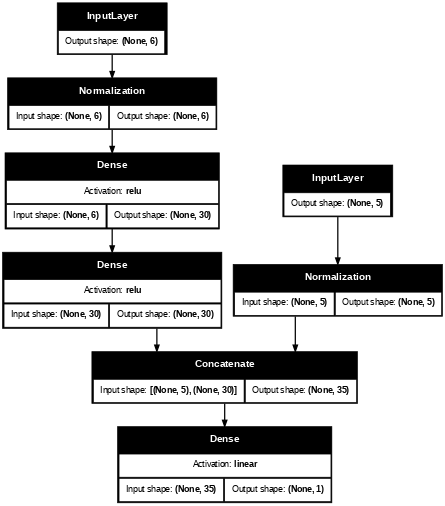

In [ ]:
tf.keras.utils.plot_model(complex_model2, to_file="complex2.png", show_shapes=True, show_layer_activations=True, dpi=45) # Plot the model

In [ ]:
# np.random.choice(np.arange(100, dtype=np.int32), size=(5, 5), replace=False)

array([[91, 25,  8,  1, 69],
       [82, 75,  6, 67, 79],
       [99, 89, 94, 38, 65],
       [41, 93, 80,  0, 17],
       [14, 24, 33, 74, 78]], dtype=int32)

In [ ]:
# Let's take all the features from housing dataset
X = np.array(housing.data)
y = np.array(housing.target)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train, y_train = X_train[:-5000], y_train[:-5000]
X_valid, y_valid = X_train[-5000:], y_train[-5000:]

In [ ]:
# Divide the data into wide and deep (because of 2 different inputs)
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [ ]:
# Train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
complex_model2.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Fit the normalization layers
normalization_layer_wide.adapt(X_train_wide)
normalization_layer_deep.adapt(X_train_deep)

# Fit the model
history = complex_model2.fit({"input_wide": X_train_wide, "input_deep": X_train_deep}, y_train, epochs=10,
                             validation_data=((X_valid_wide, X_valid_deep), y_valid))
# or just...
# history = complex_model2.fit((X_train_wide, X_train_deep), y_train, epochs=10,
#                             validation_data=((X_valid_wide, X_valid_deep), y_valid))

# Evaluate the model
mse_test = complex_model2.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = complex_model2.predict((X_new_wide, X_new_deep))

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.3071 - loss: 1.7846 - val_RootMeanSquaredError: 0.7330 - val_loss: 0.5373
Epoch 2/10


KeyboardInterrupt: 

In [ ]:
# Let's add auxiliary output for regularization so that the model can learn on its own
input_wide = tf.keras.layers.Input(shape=[5], name="input_wide") # send features 0 to 4 through wide path
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep") # send features 2 to 7 through deep path
# Normalization
normalization_layer_wide = tf.keras.layers.Normalization()
normalization_layer_deep = tf.keras.layers.Normalization()
normalization_wide = normalization_layer_wide(input_wide)
normalization_deep = normalization_layer_deep(input_deep)
# Deep Path
hidden1_deep = tf.keras.layers.Dense(30, activation="relu")(normalization_deep)
hidden2_deep = tf.keras.layers.Dense(30, activation="relu")(hidden1_deep)
# Concatenate
concat = tf.keras.layers.Concatenate()([normalization_wide, hidden2_deep])
# Output
output = tf.keras.layers.Dense(1)(concat)
output_aux = tf.keras.layers.Dense(1)(hidden2_deep)
# Assemble the model
complex_model3 = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, output_aux])

In [ ]:
complex_model3.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_deep          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_26    │ (None, 6)         │         13 │ input_deep[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_wide          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 30)        │        210 │ normalization_26… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_25    │ (None, 5)         │         11 │ input_wide[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_72 (Dense)    │ (None, 30)        │        930 │ dense_71[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 35)        │          0 │ normalization_25… │
│ (Concatenate)       │                   │            │ dense_72[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_73 (Dense)    │ (None, 1)         │         36 │ concatenate_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_74 (Dense)    │ (None, 1)         │         31 │ dense_72[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,231 (4.82 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

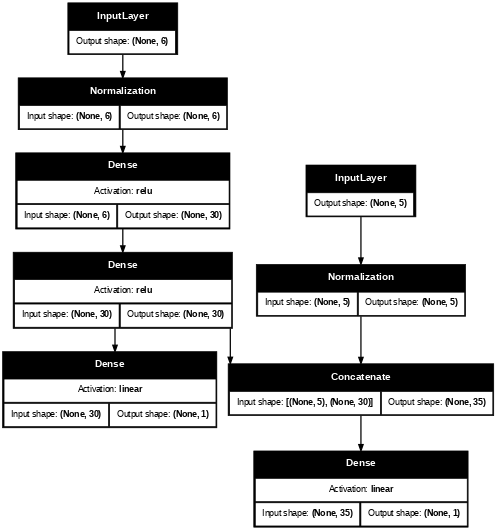

In [ ]:
tf.keras.utils.plot_model(complex_model3, to_file="complex3.png", show_shapes=True, show_layer_activations=True, dpi=45) # Plot the model

In [ ]:
# Compile multioutput model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
complex_model3.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
                       metrics=["RootMeanSquaredError", "RootMeanSquaredError"]) # we set weight 0.9 for main output and 0.1 for aux_output (main is more important)
# mistake? page 334
# You can use dict for the "loss" parameter in .compile() as well, if outputs are named

In [ ]:
# Train the model
normalization_layer_wide.adapt(X_train_wide)
normalization_layer_deep.adapt(X_train_deep)

history = complex_model3.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10, # 2 outputs = 2 y
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - dense_80_RootMeanSquaredError: 1.5587 - dense_80_loss: 2.5432 - dense_81_RootMeanSquaredError: 1.5944 - dense_81_loss: 2.6108 - loss: 2.5500 - val_dense_80_RootMeanSquaredError: 0.7645 - val_dense_80_loss: 0.5830 - val_dense_81_RootMeanSquaredError: 0.8741 - val_dense_81_loss: 0.7623 - val_loss: 0.6025
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_80_RootMeanSquaredError: 0.7311 - dense_80_loss: 0.5349 - dense_81_RootMeanSquaredError: 0.8315 - dense_81_loss: 0.6920 - loss: 0.5506 - val_dense_80_RootMeanSquaredError: 0.6884 - val_dense_80_loss: 0.4733 - val_dense_81_RootMeanSquaredError: 0.7768 - val_dense_81_loss: 0.6024 - val_loss: 0.4868
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_80_RootMeanSquaredError: 0.6706 - dense_80_loss: 0.4499 - dense_81_RootMeanSquaredError: 0.7614 - dense_81_loss: 0.5800 - loss: 0.4629 - val_dense_80_RootMeanSquaredError: 0.6602 - val_dense_80_loss: 0.4351 - val_dense_81_Ro

In [ ]:
# Evaluate
eval_results = complex_model3.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_80_RootMeanSquaredError: 0.5740 - dense_80_loss: 0.3300 - dense_81_RootMeanSquaredError: 0.6507 - dense_81_loss: 0.4246 - loss: 0.3395


In [ ]:
# Return dict
eval_results_dict = complex_model3.evaluate((X_test_wide, X_test_deep), (y_test, y_test), return_dict=True)
eval_results_dict

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_80_RootMeanSquaredError: 0.5740 - dense_80_loss: 0.3300 - dense_81_RootMeanSquaredError: 0.6507 - dense_81_loss: 0.4246 - loss: 0.3395


{'dense_80_RootMeanSquaredError': 0.5724063515663147,
 'dense_80_loss': 0.3269040584564209,
 'dense_81_RootMeanSquaredError': 0.658561110496521,
 'dense_81_loss': 0.43580362200737,
 'loss': 0.3382544219493866}

In [ ]:
# Predict
y_pred_main, y_pred_aux = complex_model3.predict((X_new_wide, X_new_deep))
y_pred_main, y_pred_aux

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


(array([[2.4203923],
        [1.4745679],
        [2.7517834]], dtype=float32),
 array([[2.421494 ],
        [1.4387276],
        [2.5197246]], dtype=float32))

In [ ]:
# Return dict with predictions
y_pred_list = complex_model3.predict((X_new_wide, X_new_deep))

y_pred_dict = dict(zip(complex_model3.output_names, y_pred_list))
y_pred_dict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


{'dense_80': array([[2.4203923],
        [1.4745679],
        [2.7517834]], dtype=float32),
 'dense_81': array([[2.421494 ],
        [1.4387276],
        [2.5197246]], dtype=float32)}

In [ ]:
# Subclassing API. Let's build the same model but with class
import tensorflow as tf
import keras

@keras.saving.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) # needed to support naming the model
    self.normalization_layer_wide = tf.keras.layers.Normalization()
    self.normalization_layer_deep = tf.keras.layers.Normalization()
    self.hidden1_deep = tf.keras.layers.Dense(30, activation=activation)
    self.hidden2_deep = tf.keras.layers.Dense(30, activation=activation)
    self.main_output = tf.keras.layers.Dense(1)
    self.aux_output = tf.keras.layers.Dense(1)

  def call(self, inputs):
    input_wide, input_deep = inputs
    norm_wide = self.normalization_layer_wide(input_wide)
    norm_deep = self.normalization_layer_deep(input_deep)
    hidden1 = self.hidden1_deep(norm_deep)
    hidden2 = self.hidden2_deep(hidden1)
    concat = tf.keras.layers.Concatenate()([norm_wide, hidden2])
    output_main = self.main_output(concat)
    output_aux = self.aux_output(hidden2)

    return output_main, output_aux

class_complex_model3 = WideAndDeepModel()

In [ ]:
# Compile multioutput model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
class_complex_model3.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
                       metrics=["RootMeanSquaredError", "RootMeanSquaredError"]) # we set weight 0.9 for main output and 0.1 for aux_output (main is more important)
# mistake? page 334
# You can use dict for the "loss" parameter in .compile() as well, if outputs are named

In [ ]:
class_complex_model3.normalization_layer_wide.adapt(X_train_wide)
class_complex_model3.normalization_layer_deep.adapt(X_train_deep)

history = class_complex_model3.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10, # 2 outputs = 2 y
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - RootMeanSquaredError: 1.3564 - RootMeanSquaredError_1: 1.9479 - loss: 2.1253 - mse_loss: 3.9035 - val_RootMeanSquaredError: 0.7075 - val_RootMeanSquaredError_1: 1.0360 - val_loss: 0.5578 - val_mse_loss: 1.0776
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6817 - RootMeanSquaredError_1: 0.9711 - loss: 0.5128 - mse_loss: 0.9437 - val_RootMeanSquaredError: 0.6379 - val_RootMeanSquaredError_1: 0.8350 - val_loss: 0.4359 - val_mse_loss: 0.7010
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.6496 - RootMeanSquaredError_1: 0.8138 - loss: 0.4462 - mse_loss: 0.6624 - val_RootMeanSquaredError: 0.6223 - val_RootMeanSquaredError_1: 0.7688 - val_loss: 0.4076 - val_mse_loss: 0.5941
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6351 - RootMeanSquaredError_1: 0.7636 - loss: 0.4216 - mse_loss: 0.5832 - val_RootMeanSquaredError: 0.6064 - val_RootMeanSquaredEr

In [ ]:
class_complex_model3.summary()

Model: "wide_and_deep_model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_16                │ (13576, 5)             │            11 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_17                │ (13576, 6)             │            13 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,647 (14.26 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

 Optimizer params: 2,416 (9.44 KB)

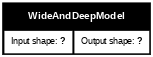

In [ ]:
tf.keras.utils.plot_model(class_complex_model3, to_file="class_complex3.png", show_shapes=True, show_layer_activations=True, dpi=45) # Plot the model

In [ ]:
# Return dict
eval_results_dict = class_complex_model3.evaluate((X_test_wide, X_test_deep), (y_test, y_test), return_dict=True)
eval_results_dict

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.6070 - RootMeanSquaredError_1: 0.6765 - loss: 0.3782 - mse_loss: 0.4578


{'RootMeanSquaredError': 0.5893954634666443,
 'RootMeanSquaredError_1': 0.6663355827331543,
 'loss': 0.35704857110977173,
 'mse_loss': 0.4445398449897766}

## Save the model

In [ ]:
class_complex_model3.save("my_keras_model.keras")

## Load the model

In [ ]:
loaded_class_complex_model3 = tf.keras.models.load_model("my_keras_model.keras")
y_pred_main, y_pred_aux = loaded_class_complex_model3.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [ ]:
y_pred_main

array([[1.6302195],
       [2.3748577],
       [0.9843856]], dtype=float32)

### Callbacks

In [ ]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:]) # Let's take normalization layer as the Input layer
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Set the optimizer and compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train) # Now fit the normalization layer so it knows what to transform

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Use checkpoints if you training the model for days (PC can crash), using callbacks
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints/checkpoint.weights.h5", save_weights_only=True, save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb], epochs=10)

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6741 - loss: 0.4548 - val_RootMeanSquaredError: 0.6469 - val_loss: 0.4185
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 0.6676 - loss: 0.4458 - val_RootMeanSquaredError: 0.6428 - val_loss: 0.4132
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6502 - loss: 0.4229 - val_RootMeanSquaredError: 0.6407 - val_loss: 0.4104
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6495 - loss: 0.4220 - val_RootMeanSquaredError: 0.6357 - val_loss: 0.4041
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6435 - loss: 0.4141 - val_RootMeanSquaredError: 0.6351 - val_loss: 0.4034
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6485 - loss: 0.4207 - val_RootMeanSquaredError: 0.6305 - val_loss: 0.3976
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6409 - los

In [ ]:
# Implement early stopping with callbacks
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb], epochs=30)

Epoch 1/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6017 - loss: 0.3621 - val_RootMeanSquaredError: 0.5834 - val_loss: 0.3404
Epoch 2/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 0.5994 - loss: 0.3595 - val_RootMeanSquaredError: 0.5799 - val_loss: 0.3363
Epoch 3/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5917 - loss: 0.3504 - val_RootMeanSquaredError: 0.5805 - val_loss: 0.3370


In [ ]:
# Or create your own callback
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback): # prints ration between val and train loss
  def on_epoch_end(self, epoch, logs):
    ratio = logs["val_loss"] / logs["loss"]
    print(f" Epoch={epoch}, val/train={ratio:.2f}")

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks=[PrintValTrainRatioCallback()], epochs=10)

Epoch 1/10
420/425 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.6362 - loss: 0.4048 Epoch=0, val/train=0.96
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6362 - loss: 0.4049 - val_RootMeanSquaredError: 0.6255 - val_loss: 0.3913
Epoch 2/10
411/425 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.6404 - loss: 0.4102 Epoch=1, val/train=0.95
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6403 - loss: 0.4101 - val_RootMeanSquaredError: 0.6230 - val_loss: 0.3881
Epoch 3/10
421/425 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.6362 - loss: 0.4048 Epoch=2, val/train=0.95
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 0.6362 - loss: 0.4048 - val_RootMeanSquaredError: 0.6208 - val_loss: 0.3855
Epoch 4/10
419/425 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.6458 - loss: 0.4175 Epoch=3, val/train=0.95
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6456 - loss: 0.4172 - 

# TensorBoard

In [ ]:
%pip install -q -U tensorboard-plugin-profile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.7 which is incompatible.


In [ ]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
  return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir() #e.g., my_logs/run_2025_05_17_14_09_46
run_logdir

PosixPath('my_logs/run_2025_05_17_14_11_45')

In [ ]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, callbacks=[tensorboard_cb], epochs=10)

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6077 - loss: 0.3693
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.5911 - loss: 0.3495
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6175 - loss: 0.3816
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6018 - loss: 0.3622
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5925 - loss: 0.3514
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6033 - loss: 0.3642
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5959 - loss: 0.3552
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5901 - loss: 0.3483
Epoch 9/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6022 - loss: 0.3627
Epoch 10/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5935 - loss: 0.3523


In [ ]:
# Start tensorboard server
%load_ext tensorboard
%tensorboard --logdir=./my_logs

# Tune the model

In [ ]:
%pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
# Scale pixels
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
import keras_tuner as kt
# First create a model builder

def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                           sampling="log")
  optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
  if optimizer == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                metrics=["accuracy"])

  return model

In [ ]:
# Now tune the model with RandomSearch class from kt
random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5, overwrite=True,
                                      directory="my_tuned_models", project_name="my_rnd_search")

random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 02m 23s]
val_accuracy: 0.8885999917984009

Best val_accuracy So Far: 0.8885999917984009
Total elapsed time: 00h 09m 25s


In [ ]:
# Get the best model
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Get the best hyperparameters
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 4,
 'n_neurons': 147,
 'learning_rate': 0.0003546505942862509,
 'optimizer': 'adam'}

In [ ]:
# Get the best trial
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 4 summary
Hyperparameters:
n_hidden: 4
n_neurons: 147
learning_rate: 0.0003546505942862509
optimizer: adam
Score: 0.8885999917984009


In [ ]:
# Get metrics directly
best_trial.metrics.get_last_value("val_accuracy")

np.float64(0.8885999917984009)

In [ ]:
# If you want to continue train the best model on the full train set
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

In [ ]:
top3_models

[<Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>]

In [ ]:
class MyClassificationHyperModel(kt.HyperModel):
  def build(self, hp):
    return build_model(hp)

  def fit(self, hp, model, X, y, **kwargs):
    if hp.Boolean("normalize"): # tune normalization (normalize or not)
      norm_layer = tf.kears.layers.Normalization()
      X = norm_layer(X)
    return model.fit(X, y, **kwargs)

In [ ]:
# Instantiate the Hyperband
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion", project_name="hyperband")

In [ ]:
# Search with hyperband
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorborad_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.EarlyStopping(patience=2)

hyperband_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

In [ ]:
# Try another tuner
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trieals=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")

bayesian_opt_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

NameError: name 'kt' is not defined

# 10.

In [41]:
import tensorflow as tf
from keras.datasets.mnist import load_data

In [42]:
(X_train, y_train), (X_test, y_test) = load_data()

In [43]:
X_val, y_val = X_train[50000:], y_train[50000:]
X_train, y_train, = X_train[:50000], y_train[:50000]

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [58]:
from keras import Sequential

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:]) # Let's take normalization layer as the Input layer

model = Sequential([
    norm_layer,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dense(50, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

In [59]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [60]:
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

In [61]:
norm_layer.adapt(X_train)

model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3993 - loss: 1.9161 - val_accuracy: 0.8099 - val_loss: 0.7834
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8076 - loss: 0.7309 - val_accuracy: 0.8664 - val_loss: 0.4970
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8628 - loss: 0.5092 - val_accuracy: 0.8907 - val_loss: 0.4108
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8844 - loss: 0.4352 - val_accuracy: 0.9028 - val_loss: 0.3670
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8972 - loss: 0.3847 - val_accuracy: 0.9091 - val_loss: 0.3416
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9045 - loss: 0.3620 - val_accuracy: 0.9168 - val_loss: 0.3218
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9096 - loss: 0.3402 - val_accuracy: 0.9202 - val_loss: 0.3074
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9145 - loss: 0.3246 

In [103]:
norm_layer = tf.keras.layers.Normalization(input_shape=(28, 28))
norm_layer.adapt(X_train)

def build_model(hp):
  n_hidden_layers = hp.Int("n_hidden_layers", min_value=0, max_value=6)
  n_neurons = hp.Int("n_neurons", min_value=25, max_value=100)
  lr = hp.Float("lr", min_value=1e-4, max_value=0.1, sampling="log")
  optimizer = hp.Choice("optimizer", ["SGD", "Adam"])
  if optimizer == "SGD":
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

  model = Sequential()
  model.add(norm_layer)
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden_layers):
    model.add(tf.keras.layers.Dense(n_neurons, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
  model.add(tf.keras.layers.Dense(10, activation="sigmoid"))

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=["accuracy"])

  return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
%pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [104]:
import keras_tuner as kt

norm_layer.adapt(X_train)
random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [105]:
es = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints/checkpoint.weights.h5", save_weights_only=True, save_best_only=True)

In [106]:
random_search_tuner.search(X_train, y_train, validation_data=(X_val, y_val), callbacks=[es, checkpoint_cb], epochs=30)

Trial 5 Complete [00h 01m 08s]
val_accuracy: 0.9140999913215637

Best val_accuracy So Far: 0.9726999998092651
Total elapsed time: 00h 10m 20s


In [129]:
random_search_tuner.get_best_hyperparameters()[0].values

{'n_hidden_layers': 3,
 'n_neurons': 59,
 'lr': 0.0012859725366202068,
 'optimizer': 'Adam'}